## Load Port Congestion Data from MarineTraffic


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


port_data = pd.read_csv('portcongestion.csv')
port_data.head()

,Port,Year,Week,Commercial Market,Commercial Size Class,Median Waiting Time Off Port Limits,Waiting Time Off Port Limits Confidence Score,Median Time At Port,Time At Port Confidence Score,Median Waiting Time Off Port Limits Standard Deviation,Time At Port Standard Deviation,Waiting Time Off Port Limits % Difference (week-to-week),Time At Port % Difference (week-to-week)
0,Yantian,2025,7,ALL,ALL,0.2,LOW,0.8,LOW,1.0,0.4,-85.7,-20.0
1,Vung tau,2025,7,ALL,ALL,0.3,MEDIUM,2.3,MEDIUM,0.2,13.8,NaN,130.0
2,Tianjin,2025,7,ALL,ALL,0.7,HIGH,1.1,HIGH,6.4,4.0,-12.5,-15.4
3,Tanjung pelepas,2025,7,ALL,ALL,0.5,LOW,0.8,LOW,2.0,0.6,-28.6,14.3
4,Singapore,2025,7,ALL,ALL,0.9,HIGH,0.8,HIGH,3.6,2.9,0.0,0.0


In [ ]:
#check for null values
port_data["Median Waiting Time Off Port Limits"].isna().sum()

3

In [ ]:
#flash fill NA values
port_data["Median Waiting Time Off Port Limits"] = port_data["Median Waiting Time Off Port Limits"].fillna(method="ffill")
port_data["Median Waiting Time Off Port Limits"].isna().sum()

<ipython-input-4-65c15d884fac>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  port_data["Median Waiting Time Off Port Limits"] = port_data["Median Waiting Time Off Port Limits"].fillna(method="ffill")


0

In [ ]:
# convert Waiting Time from days to hours
port_data["Median Waiting Time Off Port Limits"] = port_data["Median Waiting Time Off Port Limits"] * 24
port_data.head()

,Port,Year,Week,Commercial Market,Commercial Size Class,Median Waiting Time Off Port Limits,Waiting Time Off Port Limits Confidence Score,Median Time At Port,Time At Port Confidence Score,Median Waiting Time Off Port Limits Standard Deviation,Time At Port Standard Deviation,Waiting Time Off Port Limits % Difference (week-to-week),Time At Port % Difference (week-to-week)
0,Yantian,2025,7,ALL,ALL,4.8,LOW,0.8,LOW,1.0,0.4,-85.7,-20.0
1,Vung tau,2025,7,ALL,ALL,7.2,MEDIUM,2.3,MEDIUM,0.2,13.8,NaN,130.0
2,Tianjin,2025,7,ALL,ALL,16.8,HIGH,1.1,HIGH,6.4,4.0,-12.5,-15.4
3,Tanjung pelepas,2025,7,ALL,ALL,12.0,LOW,0.8,LOW,2.0,0.6,-28.6,14.3
4,Singapore,2025,7,ALL,ALL,21.6,HIGH,0.8,HIGH,3.6,2.9,0.0,0.0


In [ ]:
# Convert Year + Week Number to a Date
dates = port_data.Year.astype(str) + "-" + port_data.Week.astype(str)
port_data["Date"] =  pd.to_datetime(dates + "-1", format='%G-%V-%u') #ISO Year-Week-Day format u = 1 is Monday.
port_data.tail()


,Port,Year,Week,Commercial Market,Commercial Size Class,Median Waiting Time Off Port Limits,Waiting Time Off Port Limits Confidence Score,Median Time At Port,Time At Port Confidence Score,Median Waiting Time Off Port Limits Standard Deviation,Time At Port Standard Deviation,Waiting Time Off Port Limits % Difference (week-to-week),Time At Port % Difference (week-to-week),Date
588,Qingdao,2024,1,ALL,ALL,9.6,HIGH,0.7,HIGH,0.6,0.7,NaN,NaN,2024-01-01
589,Ningbo,2024,1,ALL,ALL,36.0,HIGH,1.0,HIGH,1.3,0.5,NaN,NaN,2024-01-01
590,Nansha,2024,1,ALL,ALL,19.2,HIGH,0.5,HIGH,1.5,0.7,NaN,NaN,2024-01-01
591,Hai phong,2024,1,ALL,ALL,4.8,HIGH,1.0,HIGH,0.7,4.5,NaN,NaN,2024-01-01
592,Busan,2024,1,ALL,ALL,12.0,HIGH,0.8,HIGH,1.4,2.9,NaN,NaN,2024-01-01


In [ ]:
port_data["Port"].unique()

array(['Yantian', 'Vung tau', 'Tianjin', 'Tanjung pelepas', 'Singapore',
       'Shanghai', 'Qingdao', 'Ningbo', 'Nansha', 'Hai phong', 'Busan'],
      dtype=object)

In [ ]:
INPUT_PORT = "Qingdao"
START = pd.to_datetime("01-01-2024")
END = pd.to_datetime("29-12-2024")
forecast_steps = 10
feature = "Median Waiting Time Off Port Limits"

<ipython-input-8-a5e7dee7ba5f>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  END = pd.to_datetime("29-12-2024")


## Plot Time Series of Median Waiting Time off Port Limits at Qingdao for 2024

In [ ]:
qingdao = port_data[(port_data["Port"] == INPUT_PORT) & (port_data["Date"] >= START) & (port_data["Date"] <= END)]
qin_2025 = port_data[(port_data["Port"] == INPUT_PORT) & (port_data["Date"] >= END)]

#set Date as index
qingdao.set_index("Date", inplace=True)
qin_2025.set_index("Date", inplace=True)
# sort index
qingdao.sort_index(inplace=True)
qin_2025.sort_index(inplace=True)

time_series = qingdao[feature]
time_series.head()

<ipython-input-9-332cb6dd780d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qingdao.sort_index(inplace=True)
<ipython-input-9-332cb6dd780d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qin_2025.sort_index(inplace=True)


,Median Waiting Time Off Port Limits
Date,
2024-01-01,9.6
2024-02-12,12.0
2024-02-19,24.0
2024-02-26,16.8
2024-03-04,9.6


We're missing data from Weeks 2 to 6. We'll omit the first date.

In [ ]:
time_series = time_series.drop(["2024-01-01"])
time_series.head()

,Median Waiting Time Off Port Limits
Date,
2024-02-12,12.0
2024-02-19,24.0
2024-02-26,16.8
2024-03-04,9.6
2024-03-11,12.0


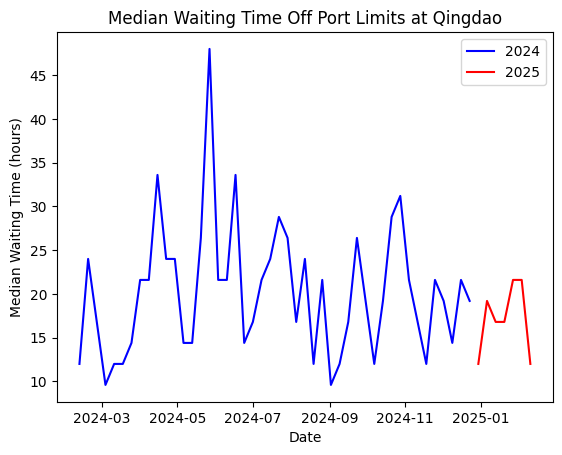

In [ ]:
plt.plot(time_series.index, time_series,label = "2024",linestyle="-",color="blue")
plt.plot(qin_2025.index, qin_2025[feature],label = "2025",linestyle="-",color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Median Waiting Time (hours)")
plt.title("Median Waiting Time Off Port Limits at Qingdao")
plt.style.use("ggplot")

## Decompose Time Series into Trend, Seasonal, and Residual Components

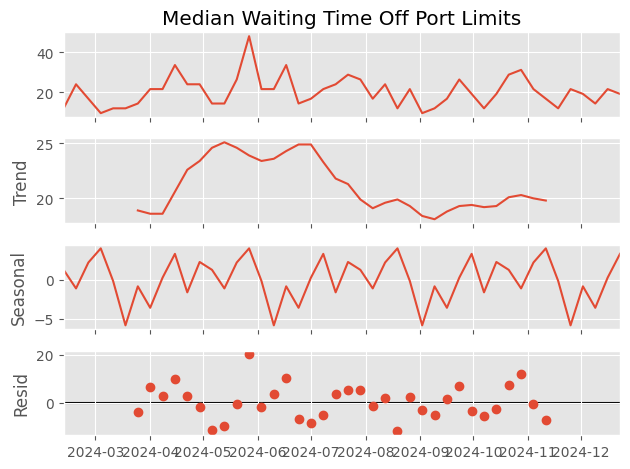

In [ ]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(time_series, model='additive',
                            period=12) #additive or multiplicative is data specific
fig = decomposition.plot()
plt.show()


## Test Time Series for Stationarity
**Stationarity** means that the mean and variance of the time series remains constant. We use the ADF Test.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag="AIC")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

    if result[1] < 0.05:
        message = "✅ The time series is stationary (reject H₀)."
    else:
        message = "❌ The time series is NOT stationary (fail to reject H₀)."

    return message
# Example: Test stationarity on 'Median_Waiting_Time'
adf_test(time_series)

ADF Statistic: -5.167478349243175
p-value: 1.0240610526460186e-05
Critical Values: {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}


'✅ The time series is stationary (reject H₀).'

## Plot ACF and PACF
The Autocorrelation and Partial Autocorrelation tells us how closely related the median port waiting time at date i is with the median port waiting time at date i-k, where k < i. k is also known as the **lag value**, and is plotted on the x-axis. Correlation is plotted on the y-axis.

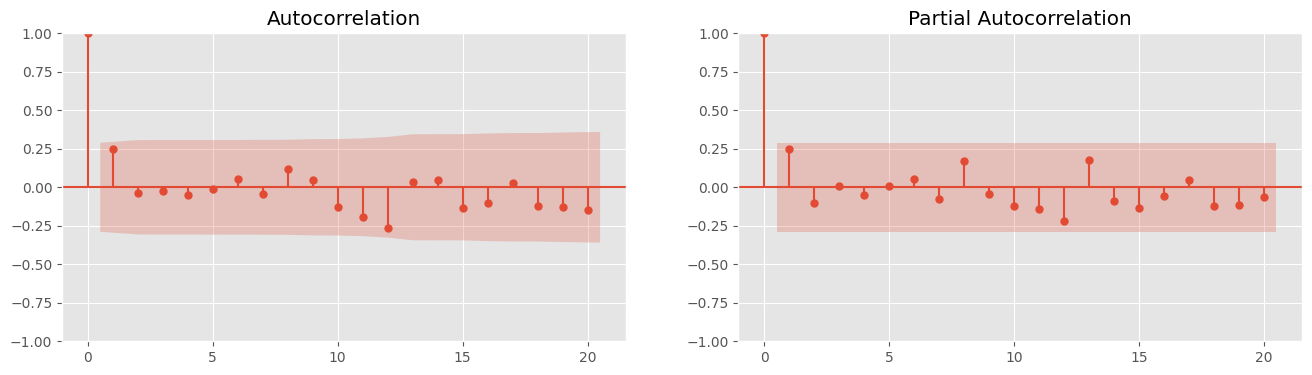

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(time_series, lags=20, ax=axes[0])
plot_pacf(time_series, lags=20, ax=axes[1])
plt.show()


## Fit an ARIMA Model and Forecast Median Waiting Times

Model Order = (p,d,q)

PACF determines the order p of the AR model. Measures correlation between observations at different lags, excluding the influence of intermediate lags. All consecutive values from 0 until the last point that lies outside the red region are possible candidate values.
ACF determines the order q of the MA model. Measures correlation between observation at different lags. All consecutives values from 0 until last point outside red region are possible candidate values.
If original series is stationary, d = 0. If differenced time series is stationary, d =1.

The **Akaike information criterion (AIC)** is a mathematical method for evaluating how well a model fits the data it was generated from. It is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. AIC estimates the quality of each model, relative to each of the other models, and provides a means for model selection.

We will automate the process of model selection, choosing the one with the smallest Akaike Information Criterion (AIC) value.


In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

best_aic = float('inf')
best_order = None
best_model = None

for p in range(4):  # Adjust range if needed
    for d in range(3):
        for q in range(4):
            try:
                model = ARIMA(time_series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
                print(f'ARIMA{(p,d,q)} - AIC:{aic:.2f}')
            except:
                continue


message = f'\n✅ Best ARIMA{best_order} model - AIC:{best_aic:.2f}'
message

ARIMA(0, 0, 0) - AIC:318.90
ARIMA(0, 0, 1) - AIC:317.45
ARIMA(0, 0, 2) - AIC:319.39
ARIMA(0, 0, 3) - AIC:321.38
ARIMA(0, 1, 0) - AIC:328.59
ARIMA(0, 1, 1) - AIC:316.78
ARIMA(0, 1, 2) - AIC:314.98
ARIMA(0, 1, 3) - AIC:316.97
ARIMA(0, 2, 0) - AIC:363.38
ARIMA(0, 2, 1) - AIC:328.12
ARIMA(0, 2, 2) - AIC:319.65
ARIMA(0, 2, 3) - AIC:319.16
ARIMA(1, 0, 0) - AIC:317.96
ARIMA(1, 0, 1) - AIC:319.40
ARIMA(1, 0, 2) - AIC:319.82
ARIMA(1, 0, 3) - AIC:321.81
ARIMA(1, 1, 0) - AIC:326.52
ARIMA(1, 1, 1) - AIC:315.41
ARIMA(1, 1, 2) - AIC:316.97
ARIMA(1, 1, 3) - AIC:318.34
ARIMA(1, 2, 0) - AIC:351.60
ARIMA(1, 2, 1) - AIC:326.64
ARIMA(1, 2, 2) - AIC:319.70
ARIMA(1, 2, 3) - AIC:321.92
ARIMA(2, 0, 0) - AIC:319.43
ARIMA(2, 0, 1) - AIC:321.39
ARIMA(2, 0, 2) - AIC:321.81
ARIMA(2, 0, 3) - AIC:325.38
ARIMA(2, 1, 0) - AIC:323.44
ARIMA(2, 1, 1) - AIC:317.06
ARIMA(2, 1, 2) - AIC:318.97
ARIMA(2, 1, 3) - AIC:320.34
ARIMA(2, 2, 0) - AIC:343.12
ARIMA(2, 2, 1) - AIC:324.21
ARIMA(2, 2, 2) - AIC:320.95
ARIMA(2, 2, 3) - AIC

'\n✅ Best ARIMA(0, 1, 2) model - AIC:314.98'

In [ ]:
#Forecast Median Waiting Time for 10 weeks and extract predictions
forecast_weeks = pd.date_range(start=END, periods=forecast_steps, freq='W-MON')
forecast = model.fit().get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_df = pd.DataFrame({"Forecast": list(forecast_values)}, index=forecast_weeks)
forecast_df



,Forecast
2024-12-30,17.747640
2025-01-06,20.685194
2025-01-13,18.904591
2025-01-20,18.873809
2025-01-27,20.657034
2025-02-03,18.677759
2025-02-10,20.043736
2025-02-17,20.121733
2025-02-24,19.242370
2025-03-03,20.526827


In [ ]:
# Get 95% Confidence intervals.
conf_int = forecast.conf_int()
conf_int

,lower Median Waiting Time Off Port Limits,upper Median Waiting Time Off Port Limits
2024-12-30,1.402632,34.092649
2025-01-06,0.099278,41.271110
2025-01-13,-4.586288,42.395470
2025-01-20,-8.284987,46.032605
2025-01-27,-9.840572,51.154640
2025-02-03,-14.030510,51.386028
2025-02-10,-16.047744,56.135215
2025-02-17,-18.281906,58.525371
2025-02-24,-21.601933,60.086672
2025-03-03,-23.066064,64.119718


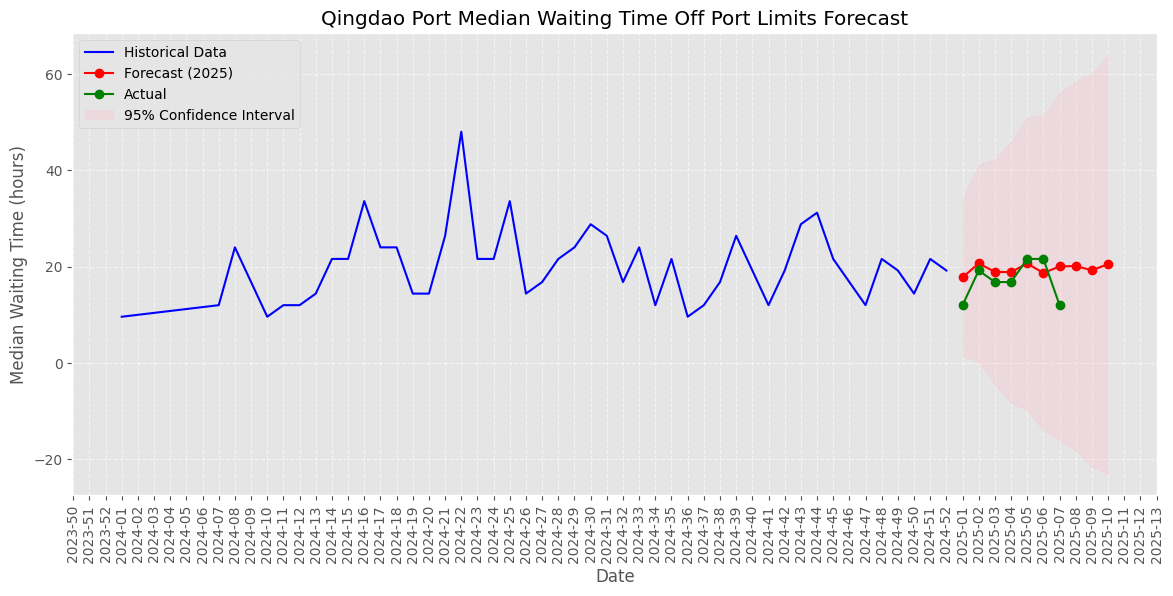

In [ ]:
## Plot the forecast and compare against actual values
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(qingdao.index, qingdao[feature], label="Historical Data", linestyle="-", color="blue")
plt.plot(forecast_df.index, forecast_df["Forecast"], label="Forecast (2025)", linestyle="-", color="red", marker='o')
plt.plot(qin_2025.index, qin_2025[feature], label="Actual", linestyle = "-", color = "green", marker="o")

#plot lower and upper confidence intervals
plt.fill_between(forecast_df.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color="pink", alpha = 0.3,label="95% Confidence Interval")

# Format X-axis

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0)) #Monday
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%G-%V'))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Median Waiting Time (hours)")
plt.title(INPUT_PORT + " Port " + feature + " Forecast")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Plot Residuals
Standardised Residual: Ideally, residuals should appear as white noise (randomly scattered around zero with no discernible patterns).
Histogram: Should be normally distributed.
Normal Q-Q plot: Points should align along diagonal line.
Correlogram (ACF): All points should lie within the red area.

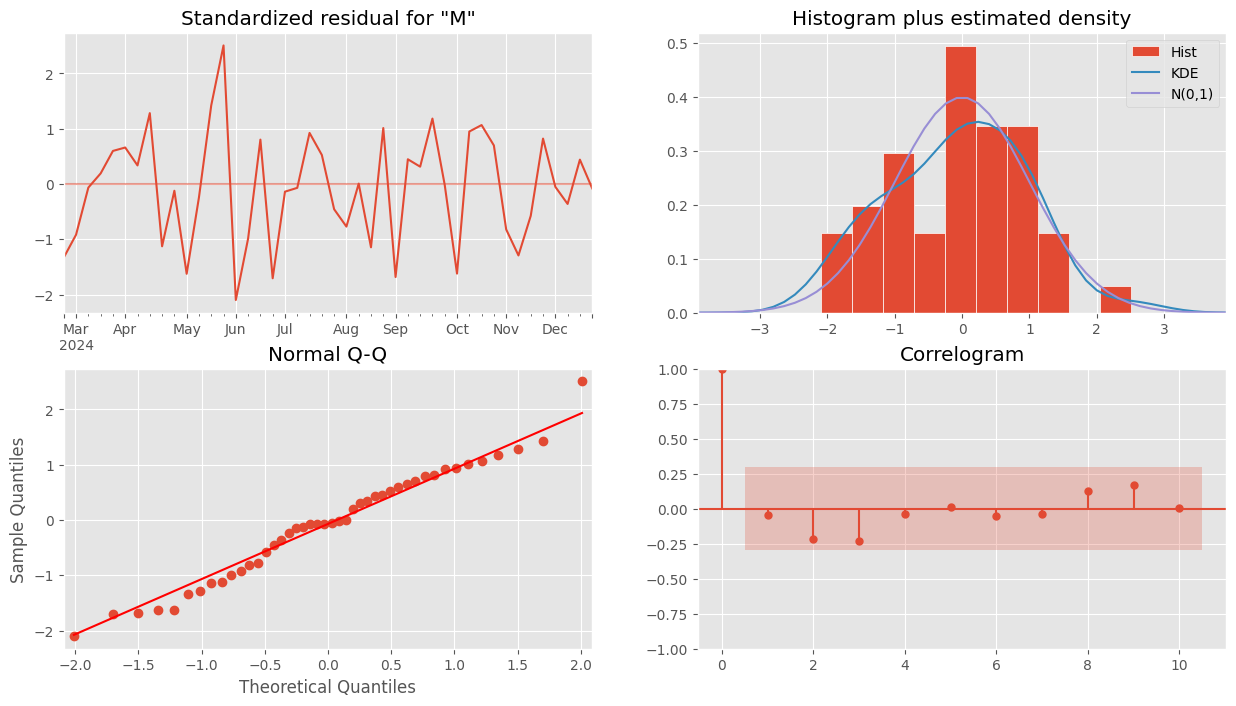

In [ ]:
residuals = model.fit().plot_diagnostics(figsize=(15,8))


## Obtain Evaluation Metrics
We will use two metrics, Mean Absolute Percentage Error (MAPE) and Root Mean Square Error (RMSE).

MAPE stands for mean absolute percentage error. It is the average multiplicative effect between each estimated mean and the observed outcome. RMSE stands for root mean squared error, i.e. standard deviation.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import math

low = min(len(qin_2025),len(forecast_values))

mae = mean_absolute_percentage_error(qin_2025.loc[forecast_weeks[0]:forecast_weeks[low-1]][feature],forecast_values[0:low])
rmse = math.sqrt(mean_squared_error(qin_2025.loc[forecast_weeks[0]:forecast_weeks[low-1]][feature],forecast_values[0:low]))
print(f"MAPE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.24
RMSE: 4.11


On average, our prediction deviates from the actual median waiting time by about 4 hours.  Forecast accuracy as measured by MAPE is 76%, not bad for a first attempt.

## Fit SARIMA Model
Can we leverage the seasonality of the data to improve forecast accuracy?

In addition to the original model order parameters (p,d,q), a SARIMA model also has seasonal order parameters (P,D,Q,s), where s represents the length of a season. For daily data, s = 7 indicates weekly seasonality. For monthly data, s = 12 indicates yearly seasonality.

For seasonal order parameters P and Q, refer to PACF/ACF, and observe for the first lag that reappears above the red region. E.g. for a seasonality of 12 months (s = 12), if the first lag that reappears is lag 24, then the parameter value is 24 / 12 = 2

We automate the selection of SARIMA models with the auto_arima() function from the pmd_arima function

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.3 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(time_series, start_P = 1, D = 1, start_Q = 1, m = 12, seasonal=True, trace=True,stepwise=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=272.893, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=262.830, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=270.920, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=273.077, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=261.249, Time=1.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=263.216, Time=7.38 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=261.289, Time=1.20 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=262.865, Time=2.53 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=262.947, Time=5.06 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=260.951, Time=2.75 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=262.218, Time=0.46 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=26

In [ ]:
# Forecast for the next 12 periods (adjust steps as needed)
n_periods = 12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Convert forecast to DataFrame for clarity
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': conf_int[:, 0],
    'Upper CI': conf_int[:, 1]
})

print(forecast_df.head())  # Check the forecast values



             Forecast  Lower CI   Upper CI
2024-12-30  20.166076  5.023560  35.308592
2025-01-06  25.211371  9.437817  40.984926
2025-01-13  19.442759  3.669205  35.216314
2025-01-20  16.470654  0.697099  32.244208
2025-01-27  25.244951  9.471397  41.018506


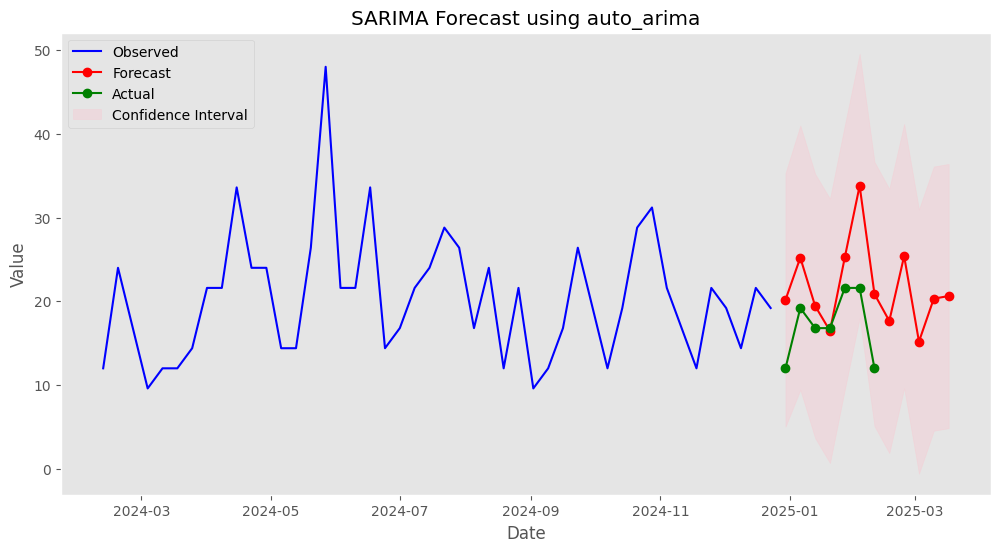

In [ ]:
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(time_series, label='Observed', color='blue')

# Plot forecast
plt.plot(forecast_df["Forecast"], label='Forecast', linestyle = '-',marker = 'o', color='red')
plt.plot(qin_2025.index, qin_2025[feature], label="Actual", linestyle = "-", color = "green", marker="o")

# Confidence intervals
plt.fill_between(forecast_df.index,
                 forecast_df['Lower CI'],
                 forecast_df['Upper CI'],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast using auto_arima')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid()
plt.show()

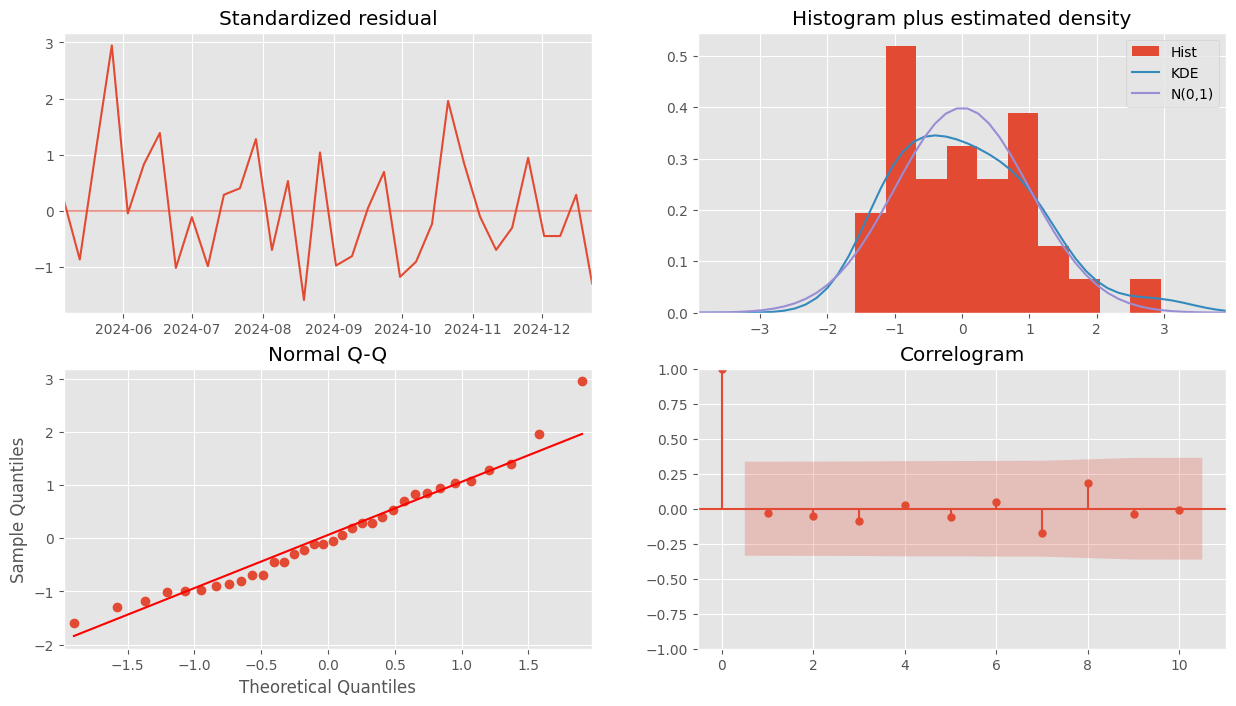

In [ ]:
results = auto_model.plot_diagnostics(figsize=(15,8))

In [ ]:
forecast_values = forecast_df["Forecast"]
low = min(len(qin_2025),len(forecast_values))

mae = mean_absolute_percentage_error(qin_2025.loc[forecast_weeks[0]:forecast_weeks[low-1]][feature],forecast_values[0:low])
rmse = math.sqrt(mean_squared_error(qin_2025.loc[forecast_weeks[0]:forecast_weeks[low-1]][feature],forecast_values[0:low]))
print(f"MAPE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.38
RMSE: 7.07


We see that accuracy has fallen to 62%, and that the standard deviation from actual has increased to 7 hours. Thus we conclude that our ARIMA model is a better forecast tool than the SARIMA model.

Achieving better performance would require more data, and tweaking of the seasonality parameter s. s= 12, but our datapoints are measured on a weekly basis. Resampling the time series to obtain monthly datapoints would be a good extension to consider.